### Data Preparation

In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [30]:
# Read crypto_data.csv into Pandas
### source: https://min-api.cryptocompare.com/data/all/coinlist
file = Path('crypto_data.csv')
crypto_df = pd.read_csv(file, index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [31]:
# Discard cryptocurrencies not being traded (filter using IsTrading column)

# Get count of values in IsTrading column for check later
print(crypto_df['IsTrading'].value_counts())

# Separate rows where IsTrading==True into new df
crypto_trading = crypto_df[crypto_df['IsTrading']==True]

# Drop IsTrading column from new df (make sure row counts match)
crypto_trading = crypto_trading.drop(['IsTrading'], axis=1)
display(crypto_trading)

True     1144
False     108
Name: IsTrading, dtype: int64


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [32]:
# Remove rows with one or more null values from crypto_trading
crypto_trading = crypto_trading.dropna()
crypto_trading

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [33]:
# Filter for cryptocurrencies that have been mined (TotalCoinsMined > 0)

# Check data type for TotalCoinsMined column is numeric
print(crypto_trading['TotalCoinsMined'].dtypes)

# Filter crypto_trading to only include rows with TotalCoinsMined > 0
crypto_trading = crypto_trading[crypto_trading['TotalCoinsMined']>0]
crypto_trading

float64


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [35]:
# Drop CoinName column from crypto_trading
crypto_trading = crypto_trading.drop(columns=['CoinName'])
crypto_trading

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [36]:
# Convert Algorithm and ProofType columns into numerical data

# Create dummy variables with get_dummies
crypto_trading_n = pd.get_dummies(crypto_trading, prefix=['Algorithm','ProofType'],
                                 columns=['Algorithm','ProofType'])

# Check that all columns are numeric
print(crypto_trading_n.dtypes.unique())

# Set all data as numeric 
crypto_trading_n = crypto_trading_n.apply(pd.to_numeric)

# Double check data types were converted
print(crypto_trading_n.dtypes.unique())

# Display dataframe 
crypto_trading_n

### How did number of rows and columns change?
### --> number of rows stayed the same, but number of columns increased by 94


[dtype('float64') dtype('O') dtype('uint8')]
[dtype('float64') dtype('uint8')]


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Standardize dataset so columns with larger values do not bias the outcome
crypto_scaled = StandardScaler().fit_transform(crypto_trading_n)
crypto_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Dimensionality Reduction

In [38]:
# Perform dimensionality reduction with PCA, preserve 90% of explained variance

# Initialize PCA model using n_components=0.90
pca = PCA(n_components=0.90)

# Get principal components for the data
crypto_pca = pca.fit_transform(crypto_scaled) 

# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(data=crypto_pca,
                             columns=['principal component %i' % i for i in range(len(crypto_pca[0]))])
crypto_pca_df

### How did number of features change?
### --> The number of features decreased from 98 to 74


,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 64,principal component 65,principal component 66,principal component 67,principal component 68,principal component 69,principal component 70,principal component 71,principal component 72,principal component 73
0,-0.335099,1.032189,-0.590713,0.001397,4.324640e-15,9.752016e-12,-6.226071e-14,-0.007129,-1.319756,-0.051813,...,8.336402e-16,-7.937942e-15,7.870363e-15,2.745853e-15,-3.848639e-16,8.608892e-16,3.041883e-15,4.896403e-15,-4.882430e-15,7.262069e-17
1,-0.318434,1.032331,-0.591126,0.001386,4.295822e-15,9.672416e-12,-6.259683e-14,-0.007739,-1.322514,-0.056674,...,7.405942e-16,-7.733206e-15,7.729563e-15,2.987012e-15,-2.805047e-16,7.514783e-16,3.019553e-15,5.034150e-15,-4.693110e-15,1.065456e-15
2,2.305468,1.656383,-0.683617,0.004731,8.811888e-15,3.304775e-11,-9.075653e-14,-0.054781,-1.542879,-0.943951,...,1.579313e-13,7.656166e-14,-2.598442e-13,2.348443e-14,-6.134063e-14,5.688523e-15,-6.166293e-14,7.925112e-14,1.796982e-14,-2.820529e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-2.835182e-15,-8.578805e-12,2.236025e-14,-0.002071,0.281463,0.251862,...,1.883129e-14,5.206451e-15,-4.109907e-14,3.400920e-15,9.182469e-15,3.086738e-15,-7.760970e-15,1.574545e-14,1.363806e-14,-1.999674e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-7.138126e-15,-1.191114e-11,4.761144e-14,0.027735,0.519099,0.188820,...,-1.695646e-14,-3.089158e-15,1.896659e-13,-8.831415e-14,2.102708e-13,1.220167e-13,-1.844971e-14,7.231202e-14,1.693269e-13,-2.162087e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,1.664806e-14,-5.749387e-11,-4.025011e-14,-0.851713,2.041159,3.560713,...,1.497499e-14,1.421374e-16,-4.228600e-14,3.318128e-15,1.295727e-14,-2.405213e-15,-8.546938e-15,1.775097e-14,1.515504e-14,-2.700685e-14
528,-0.333144,1.032071,-0.590740,0.001399,4.223369e-15,9.768210e-12,-6.244300e-14,-0.007154,-1.320125,-0.052460,...,8.211810e-16,-7.852568e-15,7.801890e-15,2.820136e-15,-5.216533e-16,6.585152e-16,3.062419e-15,5.013533e-15,-4.753853e-15,2.458856e-16
529,0.324349,-2.312308,0.421515,-0.001319,-4.420488e-15,-9.204796e-12,4.382577e-14,0.017309,0.161077,-0.047787,...,-8.897569e-15,-3.310813e-14,2.131657e-14,-2.281635e-14,8.705783e-14,-7.318371e-15,1.739282e-14,-2.113620e-16,3.891081e-14,-1.371471e-13
530,-0.149364,-2.049336,0.412968,-0.001745,-4.243369e-15,-1.218340e-11,4.722599e-14,0.028954,0.544389,0.233373,...,1.906847e-15,-1.440044e-15,-7.046385e-15,-4.530267e-15,1.255693e-15,2.729018e-15,1.320548e-15,1.599188e-15,-3.264331e-15,4.837504e-15


In [62]:
# Further reduce the dataset dimensions by running t-SNE on the principal components (PCA transformation output)

# Initialize t-SNE model
tsne = TSNE(learning_rate=300)

# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca_df)

# Check that dimensions have been reduced
tsne_features.shape

(532, 2)

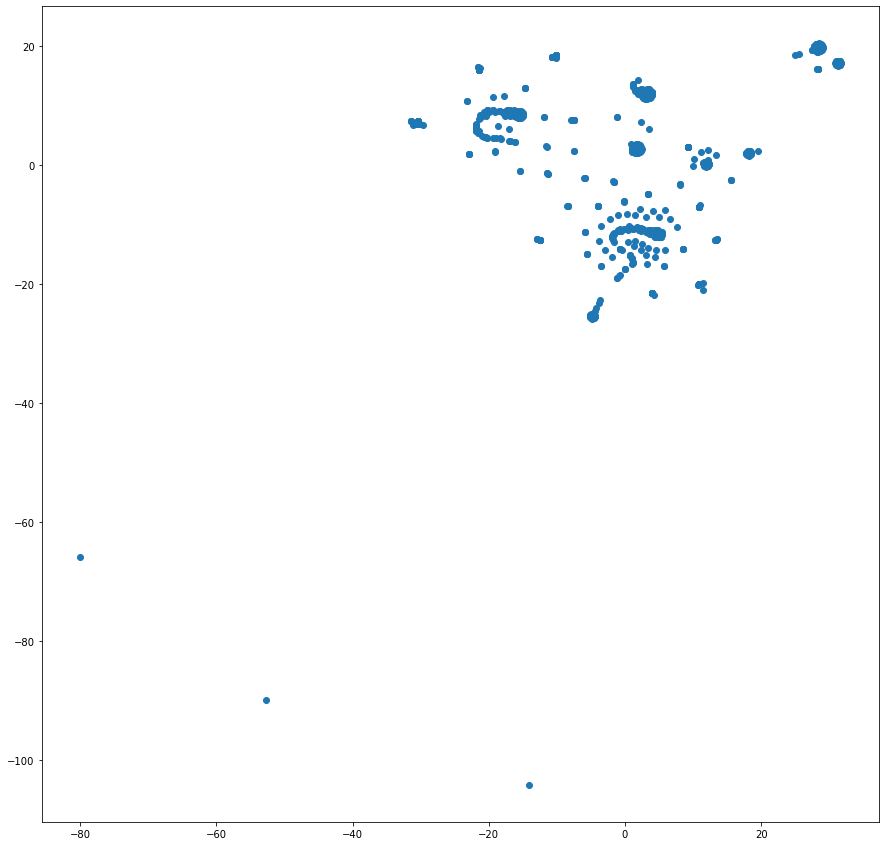

In [63]:
# Create a scatter plot of the t-SNE output and observe clusters (if any)

# Make a copy of the crypto_pca_df to create the crypto_tsne_df
crypto_tsne_df = crypto_pca_df.copy()

# Add x and y columns to crypto_tsne_df
crypto_tsne_df['x'] = tsne_features[:,0]
crypto_tsne_df['y'] = tsne_features[:,1]

# Display the t-SNE scatter plot
plt.figure(figsize=(15,15))
plt.scatter(crypto_tsne_df['x'], crypto_tsne_df['y'])
plt.show()

### Are there distinct clusters?
### --> There seems to be at least 2 (possibly around 4) distinct clusters based on the plot

### Cluster Analysis with k-Means

C:\Users\Angela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,277683.152678
1,2,191224.422751
2,3,125779.094826
3,4,101793.178364
4,5,78314.272564
5,6,71116.768108
6,7,66532.894669
7,8,63030.777044
8,9,59449.307889
9,10,59151.401669


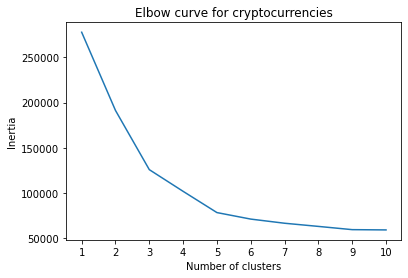

In [65]:
# Create an elbow plot to identify the best number of clusters

# Use a for-loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_tsne_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
crypto_elbow = pd.DataFrame(elbow_data)
display(crypto_elbow)

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(crypto_elbow['k'], crypto_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrencies')
plt.show()

# Determine, if possible, where the elbow of the plot is
# and at which value of k it appears.

### Recommendation

Based on the scatter plot and elbow curve, it seems that the cryptocurrecncies can be clustered together, with the optimal number of clusters being about 4 or 5. 

Upon further analysis (included below), three of the data points may be outliers as they are spread out further away from the rest of the points on the scatter plot; if these were to be excluded from the data, the optimal number of clusters would be 4 as demostrated below.

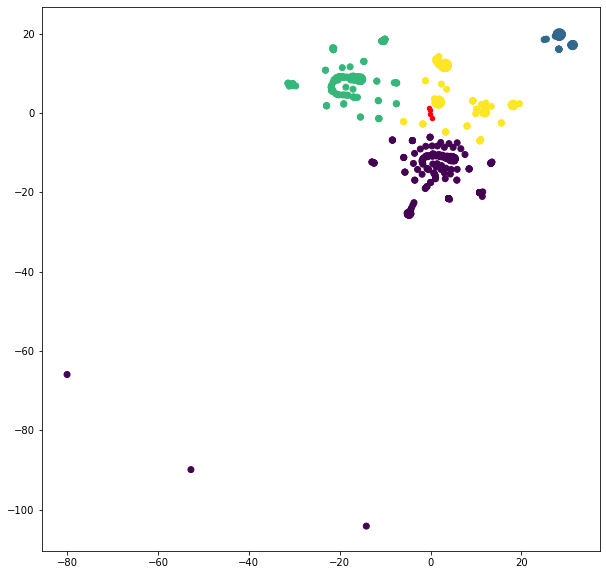

In [97]:
# Further analysis...

# Run k-means predictions with clusters = 4
kmeans_4 = KMeans(n_clusters=4, random_state=0)
y_kmeans_4 = kmeans_4.fit_predict(crypto_tsne_df)

# Run k-means predictions with clusters = 5
kmeans_5 = KMeans(n_clusters=5, random_state=0)
y_kmeans_5 = kmeans_5.fit_predict(crypto_tsne_df)

# Copy crypto_tsne_df, add the prediction outputs into new columns
crypto_cluster_df = crypto_tsne_df.copy()
crypto_cluster_df['y_kmeans_4'] = y_kmeans_4
crypto_cluster_df['y_kmeans_5'] = y_kmeans_5
#display(crypto_cluster_df)

# Create t-SNE scatter plot, use cluster predictions for color coding
# -- Clusters = 4
plt.figure(figsize=(10,10))
plt.scatter(crypto_cluster_df['x'], crypto_cluster_df['y'], c=crypto_cluster_df['y_kmeans_4'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red', label='Centroids')
plt.show()

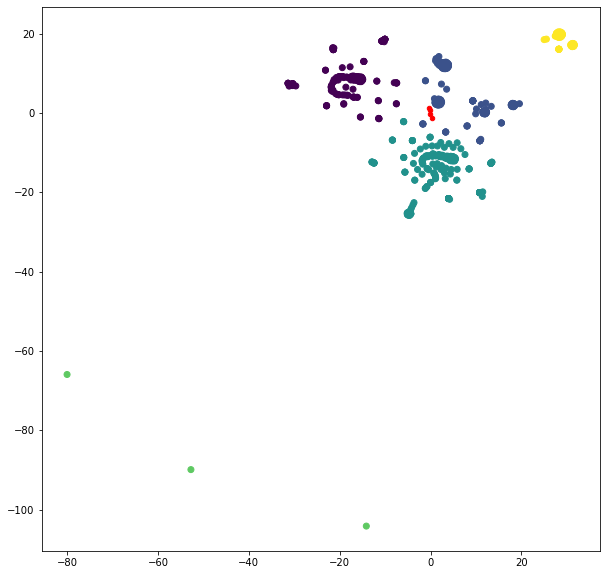

In [99]:
# -- Clusters = 5
plt.figure(figsize=(10,10))
plt.scatter(crypto_cluster_df['x'], crypto_cluster_df['y'], c=crypto_cluster_df['y_kmeans_5'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red', label='Centroids')
plt.show()